<a href="https://colab.research.google.com/github/aycaaozturk/Nail-Melanoma-Project/blob/main/SwinTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set your dataset path

extract_dir = '/content/drive/My Drive/yolov8 format all datasets'



# Define paths
train_dir = os.path.join(extract_dir, 'nail_dataset', 'train')
test_dir = os.path.join(extract_dir, 'nail_dataset', 'test')

Mounted at /content/drive


In [ ]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 1700 images belonging to 2 classes.
Found 486 images belonging to 2 classes.


In [ ]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # feature extractor
    tf.keras.layers.MaxPooling2D(2, 2),                                               # reduces dimension
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),                                        # from image to vector    from 2d  ->>>> to 1d
    tf.keras.layers.Dense(512, activation='relu'),                # dense layer for complexer relations
    tf.keras.layers.Dense(1, activation='sigmoid')                # probability for the class
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Save the model to Google Drive
model_save_path = '/content/drive/My Drive/nail_cnn_model.h5'  # Update with your desired Google Drive path
model.save(model_save_path)
print(f"Model saved as '{model_save_path}'")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 465s 9s/step - accuracy: 0.7684 - loss: 0.5869 - val_accuracy: 0.7563 - val_loss: 0.5375
Epoch 2/10
 1/53 ━━━━━━━━━━━━━━━━━━━━ 1:20 2s/step - accuracy: 0.7500 - loss: 0.6387

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step - accuracy: 0.7500 - loss: 0.6387 - val_accuracy: 0.7563 - val_loss: 0.5446
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7838 - loss: 0.5198 - val_accuracy: 0.7875 - val_loss: 0.5087
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9375 - loss: 0.2916 - val_accuracy: 0.7875 - val_loss: 0.5398
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8290 - loss: 0.4489 - val_accuracy: 0.8396 - val_loss: 0.4246
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.8438 - loss: 0.4396 - val_accuracy: 0.8438 - val_loss: 0.4310
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8327 - loss: 0.4485 - val_accuracy: 0.8542 - val_loss: 0.3731
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.7812 - loss: 0.4939 - val_accuracy: 0.8542 - val_loss: 0.3717
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.8505 - loss: 0.3981 - val_accuracy: 0.8292 - val_

Model saved as '/content/drive/My Drive/nail_cnn_model.h5'


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

# Confusion Matrix and Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')
target_names = ['Healthy', 'Melanoma']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

# Plot and save the accuracy and loss curves
plt.figure(figsize=(8, 8))

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 679ms/step - accuracy: 0.9559 - loss: 0.2373
Test accuracy: 0.83
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 514ms/step
Confusion Matrix
[[363   0]
 [ 85  38]]
Classification Report
              precision    recall  f1-score   support

     Healthy       0.81      1.00      0.90       363
    Melanoma       1.00      0.31      0.47       123

    accuracy                           0.83       486
   macro avg       0.91      0.65      0.68       486
weighted avg       0.86      0.83      0.79       486



<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 600x600 with 0 Axes>

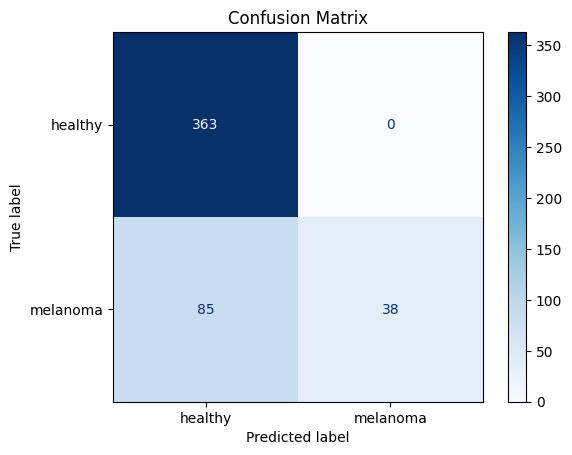

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Get class labels from your generator
class_labels = list(test_generator.class_indices.keys())

# Display confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


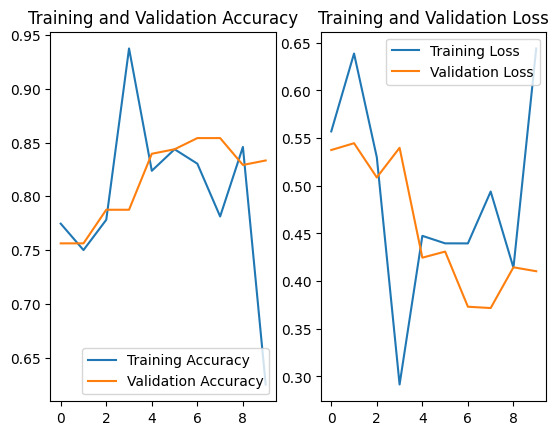

Training and validation accuracy/loss curves saved as '/content/drive/My Drive/accuracy_loss_curves.png'


In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Save the plot as an image file to Google Drive
plot_save_path = '/content/drive/My Drive/accuracy_loss_curves.png'  # Update with your desired Google Drive path
plt.savefig(plot_save_path)
plt.show()

print(f"Training and validation accuracy/loss curves saved as '{plot_save_path}'")